In [1159]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import joblib

# Lectura de CSV y Almacenamiento en DataFrame con Pandas

In [1160]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Dia 19/air_pollution new.csv', sep=';')
df.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0,0,0,16,12.5,14.5,14.4
2,Algiers,Algeria,0,0,21.2,20.2,20,17.8,17.4
3,Ordino,Andorra,0,0,0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0,0,15.9,13,11,8.8,8.7


Exploración de datos

In [1161]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 6985
Total de variables disponibles (columnas) = 9 
Columnas que cuentan con un valor nulo -
city       0
country    0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64


Vizualisar las primeras filas del dataframe con pandas

In [1162]:
df2.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0,0,0,16,12.5,14.5,14.4
2,Algiers,Algeria,0,0,21.2,20.2,20,17.8,17.4
3,Ordino,Andorra,0,0,0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0,0,15.9,13,11,8.8,8.7


Vizualisar las ultimas filas del dataframe con pandas

In [1163]:
df2.tail()

,city,country,2017,2018,2019,2020,2021,2022,2023
6980,Thanh Pho Lang Son,Vietnam,0,0,0,0,36.8,14.6,15
6981,Thu Duc,Vietnam,0,0,0,0,20.1,24.5,24.5
6982,Tra Vinh,Vietnam,0,0,0,0,6.2,5.5,5.5
6983,Trang Bang,Vietnam,0,0,0,0,0,12.9,12.4
6984,Lusaka,Zambia,0,0,0,0,24.6,24.6,24.4


CAMBIAR LOS DATOS A FLOAT DESDE EL 207 AL 2023

In [1164]:
columna_años = ['2017','2018','2019','2020','2021','2022','2023']
df2[columna_años] = df2[columna_años].apply(pd.to_numeric, errors = 'coerce',).fillna(0).astype(float)

Pregunta 1: ¿Cuál es el promedio de contaminación del aire en 2021?

In [1165]:
promedio_2021 = df2['2021'].mean()
print(promedio_2021)

12.437372226198997


Pregunta 2: ¿Cuántas ciudades únicas hay en el dataset?

In [1166]:
ciudades_unicas = df2['city'].nunique()
print(ciudades_unicas)

6852


Pregunta 3: ¿Cómo ha evolucionado la contaminación promedio anual desde 2017 hasta 2023?

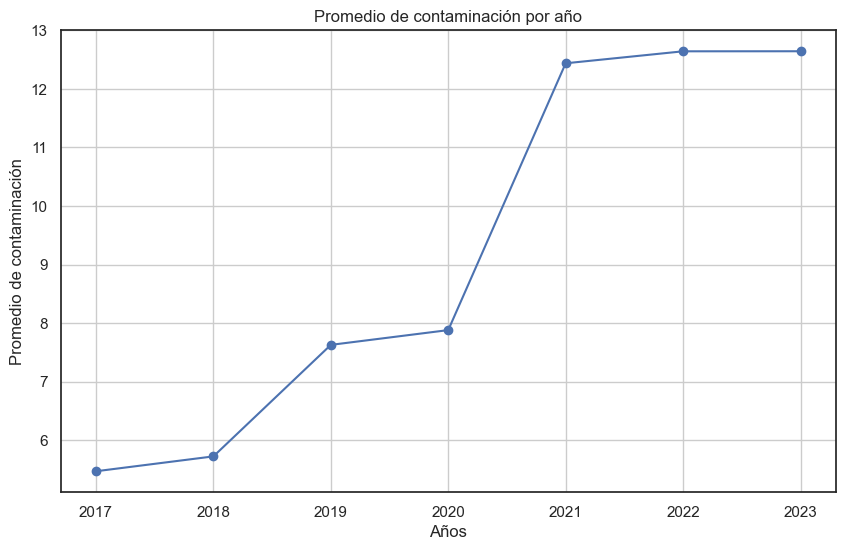

In [1167]:
promedio_años = df2[columna_años].mean()
plt.figure(figsize = (10,6))
plt.plot(promedio_años , marker = 'o')
plt.xlabel('Años')
plt.ylabel('Promedio de contaminación')
plt.title('Promedio de contaminación por año')
plt.grid(True)
plt.show()

Pregunta 4 Vizualizar las 10 ciudades más contaminadas en el año 2023 :

C:\Users\FRANK\AppData\Local\Temp\ipykernel_22108\2987555674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = '2023' , y = 'city' , data = top_ciudades_contaminadas , palette = 'inferno')


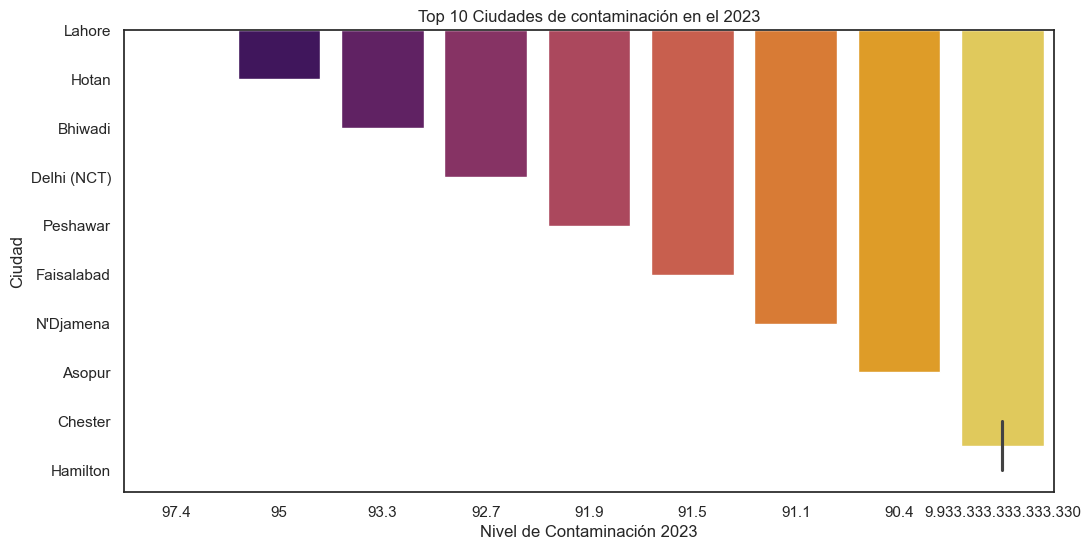

In [1168]:
top_ciudades_contaminadas = df.sort_values(by ='2023', ascending=False).head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = '2023' , y = 'city' , data = top_ciudades_contaminadas , palette = 'inferno')
plt.xlabel('Nivel de Contaminación 2023')
plt.ylabel('Ciudad')
plt.title('Top 10 Ciudades de contaminación en el 2023')
plt.show()

Pregunta 5 Realizar un diagrama de correlación

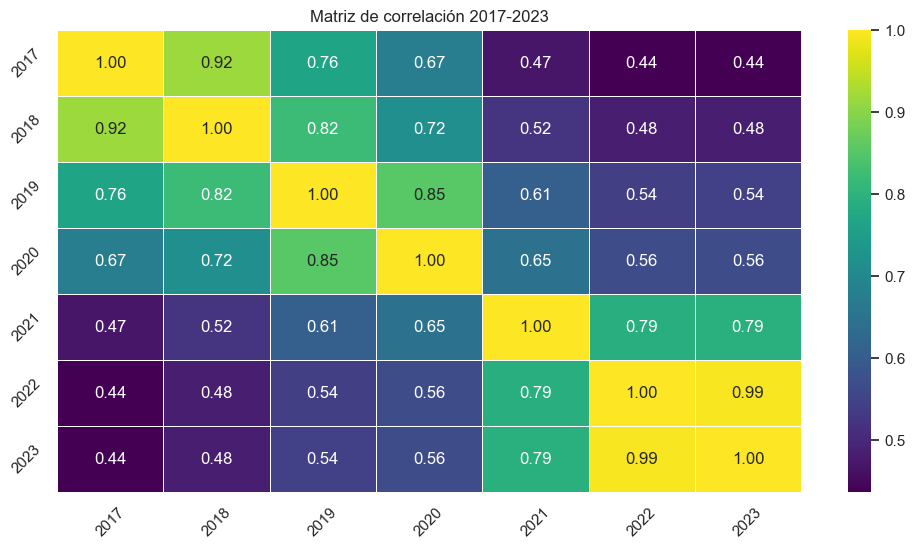

In [1169]:
matriz_corr = df2[columna_años].corr()
plt.figure(figsize = (12,6))
sns.set(style = 'white')
sns.heatmap(matriz_corr , annot = True , cmap='viridis' , linewidths=0.5 , fmt='.2f')
plt.title('Matriz de correlación 2017-2023')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

6. Comparar los niveles de contaminación de diferentes ciudades en un año específico

C:\Users\FRANK\AppData\Local\Temp\ipykernel_22108\2101572052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = años , y = valores , palette = 'inferno')


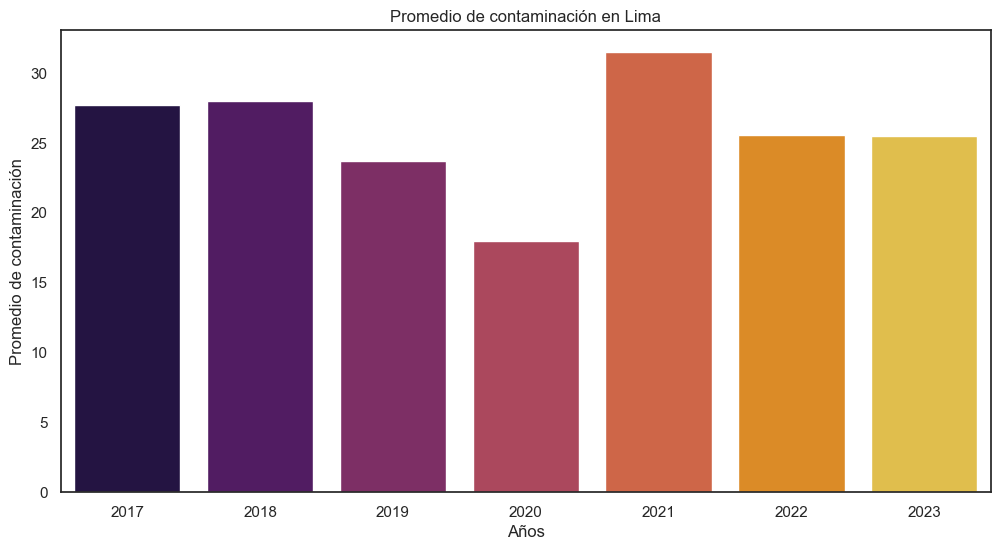

In [1170]:
lima = df2[df['city'] == 'Lima']
promedio_años_lima = lima[columna_años].mean()
años = columna_años
valores = promedio_años_lima.values

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.barplot(x = años , y = valores , palette = 'inferno')
plt.xlabel('Años')
plt.ylabel('Promedio de contaminación')
plt.title('Promedio de contaminación en Lima')
plt.show()

In [1171]:
df2.head()

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0.0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0.0,0.0,0.0,16.0,12.5,14.5,14.4
2,Algiers,Algeria,0.0,0.0,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,0.0,0.0,0.0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0.0,0.0,15.9,13.0,11.0,8.8,8.7


In [1172]:
# One-Hot Encoding para características categóricas
#ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#cat_encoded = ohe.fit_transform(df2[['city','country']])
#cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(['city','country']))
#df2 = df2.drop(columns=['city', 'country'])
#df2 = pd.concat([cat_encoded_df, df2], axis=1)

In [1173]:
df2.drop(columns='city',inplace=True)
df2.drop(columns='country', inplace=True)

In [1174]:
print(df2.head())

   2017  2018  2019  2020  2021  2022  2023
0   0.0  61.8  58.8  46.5  37.5  17.1  18.1
1   0.0   0.0   0.0  16.0  12.5  14.5  14.4
2   0.0   0.0  21.2  20.2  20.0  17.8  17.4
3   0.0   0.0   0.0   7.4   7.3   5.4   5.3
4   0.0   0.0  15.9  13.0  11.0   8.8   8.7


In [1175]:
# Crear columna 2024

#if '2024' not in df2.columns:   
 #df2['2024'] = np.nan

In [1176]:
df2.head()
#df2.fillna('0')

,2017,2018,2019,2020,2021,2022,2023
0,0.0,61.8,58.8,46.5,37.5,17.1,18.1
1,0.0,0.0,0.0,16.0,12.5,14.5,14.4
2,0.0,0.0,21.2,20.2,20.0,17.8,17.4
3,0.0,0.0,0.0,7.4,7.3,5.4,5.3
4,0.0,0.0,15.9,13.0,11.0,8.8,8.7


# Regresión Lineal

Error cuadrático medio: 3.535116247846913e-28


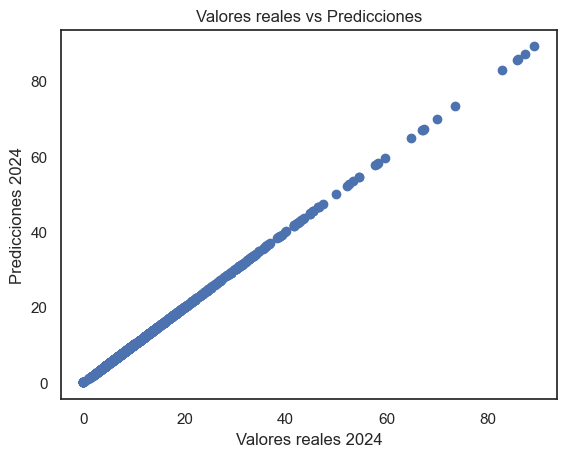

In [1177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Entrenamiento y Tarjet
X = df2[['2017','2018','2019','2020','2021','2022','2023']].values
y = df2['2023'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Predecir valores de 2024 para todas las filas
df2['2024_pred'] = model.predict(scaler.transform(X))

# Visualizar los resultados para el conjunto de prueba
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales 2024')
plt.ylabel('Predicciones 2024')
plt.title('Valores reales vs Predicciones')
plt.show()



In [1178]:
df2.head()

,2017,2018,2019,2020,2021,2022,2023,2024_pred
0,0.0,61.8,58.8,46.5,37.5,17.1,18.1,0.501830
1,0.0,0.0,0.0,16.0,12.5,14.5,14.4,0.161160
2,0.0,0.0,21.2,20.2,20.0,17.8,17.4,0.437379
3,0.0,0.0,0.0,7.4,7.3,5.4,5.3,-0.676704
4,0.0,0.0,15.9,13.0,11.0,8.8,8.7,-0.363656


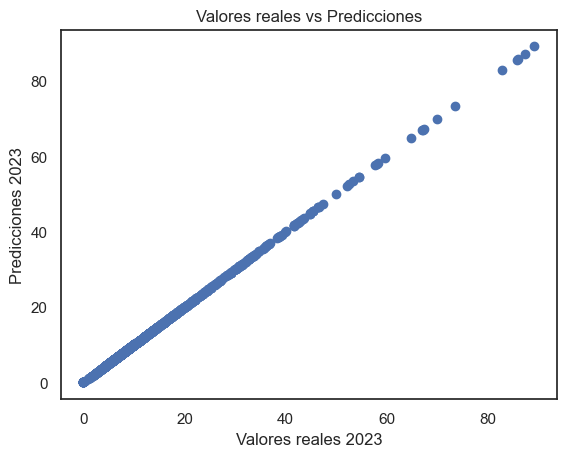

In [1179]:
# Predecir valores de 2024 para todas las filas
scaled_predictions = model.predict(scaler.transform(X))

# Dado que solo escalamos las características, no deberíamos aplicar inversa en todas las columnas
# Aquí estamos asumiendo que las características están escaladas y las predicciones están en la misma escala
# Pero necesitamos revertir la escala de las predicciones, no de las características

# Revertir la escala de las predicciones
pred_mean = y.mean()
pred_std = y.std()
original_scale_predictions = scaled_predictions * pred_std + pred_mean

# Agregar las predicciones al DataFrame
df2['2024_pred'] = original_scale_predictions

# Visualizar los resultados para el conjunto de prueba
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales 2023')
plt.ylabel('Predicciones 2023')
plt.title('Valores reales vs Predicciones')
plt.show()

In [1180]:
df2.head()

,2017,2018,2019,2020,2021,2022,2023,2024_pred
0,0.0,61.8,58.8,46.5,37.5,17.1,18.1,18.084408
1,0.0,0.0,0.0,16.0,12.5,14.5,14.4,14.390376
2,0.0,0.0,21.2,20.2,20.0,17.8,17.4,17.385537
3,0.0,0.0,0.0,7.4,7.3,5.4,5.3,5.305053
4,0.0,0.0,15.9,13.0,11.0,8.8,8.7,8.699569


# Analisis

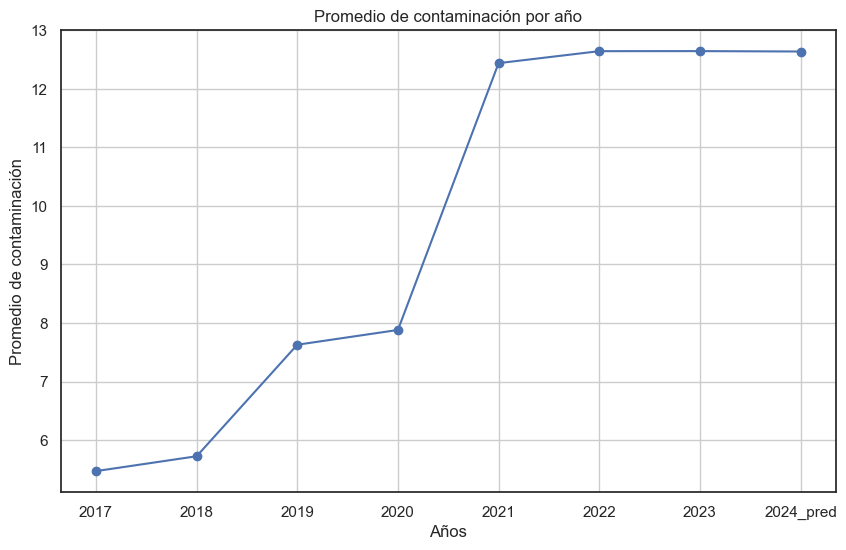

In [1181]:
promedio_años_nuevo = ['2017','2018','2019','2020','2021','2022','2023','2024_pred']
promedio_años_2 = df2[promedio_años_nuevo].mean()
plt.figure(figsize = (10,6))
plt.plot(promedio_años_2 , marker = 'o')
plt.xlabel('Años')
plt.ylabel('Promedio de contaminación')
plt.title('Promedio de contaminación por año')
plt.grid(True)
plt.show()

C:\Users\FRANK\AppData\Local\Temp\ipykernel_22108\2801359928.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=años, y=valores, palette='inferno')


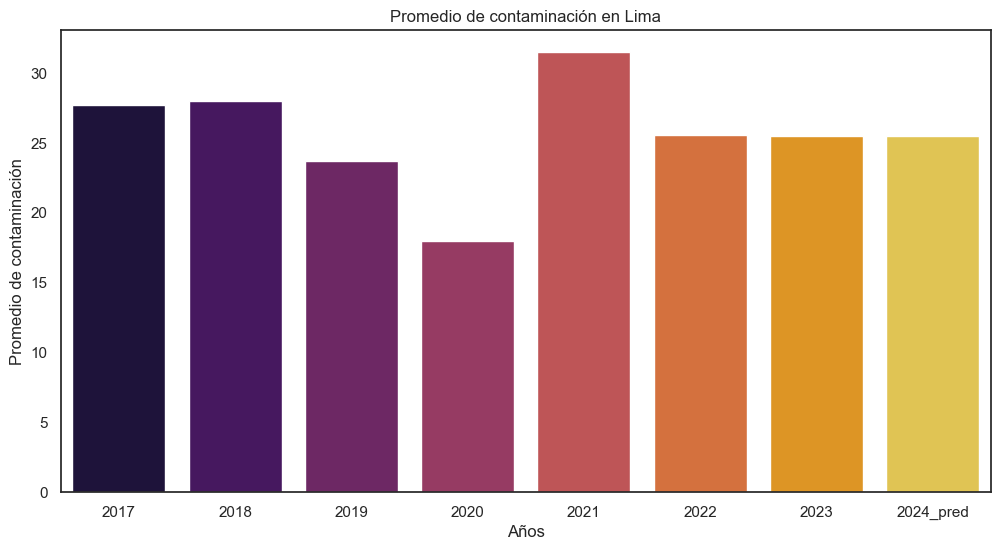

In [1182]:
# Filtrar los datos para la ciudad de Lima
lima = df2[df['city'] == 'Lima']

# Definir los años y calcular los promedios para cada año, incluyendo el predicho para 2024
promedio_años_nuevo = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024_pred']
promedio_años_lima = lima[promedio_años_nuevo].mean()

# Definir los años y valores para el gráfico
años = promedio_años_nuevo
valores = promedio_años_lima.values

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=años, y=valores, palette='inferno')
plt.xlabel('Años')
plt.ylabel('Promedio de contaminación')
plt.title('Promedio de contaminación en Lima')
plt.show()